<font color = 'blue'> <h1> <center> Processo Seletivo Poli Júnior - 2023.0  </center> </h1> </font> 
    <h2> <center> Núcleo de Produção - Analytics </center> </h2>
    

Olá, boas vindas ao Processo Seletivo 2023.0 da Poli Júnior! Essa é a versão do PS para quem deseja executar um entregável relacionado a área de Analytics.
O entregável de Analytics será exclusivamente feito em Python, usando algumas bibliotecas voltadas para a análise de dados em si. Seguem algumas regras gerais para o entregável:<ul>
<li>A entrega consiste em enviar esse mesmo arquivo em .ipynb até às 23:59 horas do dia 01/02. <br></li>
<li>Disponibilizamos vídeos para introdução aos conteúdos cobrados, no link: https://drive.google.com/drive/folders/1BOvPgISUJM43Tj_Tsim5R9s_3KxkBz0t?usp=sharing.</li><li> Além disso, há um grupo para tirar dúvidas, no link: https://chat.whatsapp.com/HrY3XWszDkIFCumlbWRv5u<br></li>
<li>Avaliaremos todo o conteúdo feito, não sendo necessesário o preenchimento de todos os itens para prosseguir a etapa de avaliação<br></li>
<li><b>NÃO SE IDENTIFIQUE NO ARQUIVO, APENAS COM O NÚMERO USP NO NOME DO ARQUIVO</b> <br></li>
    <li>Adicione quantas células forem necessárias<br></li>

<li>O resultado será corrigido de acordo com as informações da base, não se preocupe em ir atrás de dados on-line<br></li></ul>
<b>Obrigado pela atenção e bom entregável.</b>


# Parte 1: Perguntas diretas

A primeira parte do entregável consiste em perguntas diretas que devem ser respondidas no espaço destinado. A base foi fornecida por uma grande rede de supermercados, cliente da Poli Júnior.


A base consiste das seguinte colunas:
* Product: Nome do produto<br>

* Order ID: ID do pedido<br>

* Order Date: Data do pedido<br>

* category: Categoria do produto<br>

* sub_category: Sub categoria do produto <br>

* brand: Marca do Produto<br>

* sale_price: Preço de Venda <br>

* market_price: Preço de mercado<br>

* type: Tipo do produto<br>

* rating: Avaliação do produto<br>

* Quantity Ordered: Quantidade comprada <br>

* Pesquisa: Pesquisa realizada pelo supermercado com 3 perguntas. Sobre conhecimento do mercado (Indicação, Internet, Placas, Outros, 0), qualidade do produto (Ótimo, Bom, Ruim, Péssimo, 0) e preferência de compra (Física, Online,0), em que 0 representa resposta em branco. As respostas estão fora de ordem dentro de uma lista da coluna.<br>









#### Importação das bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Leitura da base de dados

In [2]:
#Leitura da base (coloque o arquivo na mesma pasta na qual o código está salvo)
df=pd.read_csv("BasePS230.csv")

# Questão 1 - Limpeza da base  
###  É sempre importante verificar a integridade da base e de suas colunas.

#### a) Verifique se há valores em branco nas colunas. Em caso positivo, remova as linhas com valores em branco. 






In [3]:
df.isna().sum()

Product             0
Order ID            0
Order Date          0
category            0
sub_category        0
brand               0
sale_price          0
market_price        0
type                0
rating              0
Quantity Ordered    0
Pesquisa            0
dtype: int64

In [4]:
df.isnull().sum()

Product             0
Order ID            0
Order Date          0
category            0
sub_category        0
brand               0
sale_price          0
market_price        0
type                0
rating              0
Quantity Ordered    0
Pesquisa            0
dtype: int64

Não há valores nulos, logo nenhuma linha deve ser removida

#### b) Verifique os tipos de dados de cada coluna. Caso existir um melhor tipo de dado para a coluna, realizar a alteração. Lembre-se do calendário.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174858 entries, 0 to 174857
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           174858 non-null  object 
 1   Order ID          174858 non-null  int64  
 2   Order Date        174858 non-null  object 
 3   category          174858 non-null  object 
 4   sub_category      174858 non-null  object 
 5   brand             174858 non-null  object 
 6   sale_price        174858 non-null  float64
 7   market_price      174858 non-null  float64
 8   type              174858 non-null  object 
 9   rating            174858 non-null  float64
 10  Quantity Ordered  174858 non-null  int64  
 11  Pesquisa          174858 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.0+ MB


In [6]:
df.head(1)

,Product,Order ID,Order Date,category,sub_category,brand,sale_price,market_price,type,rating,Quantity Ordered,Pesquisa
0,Moisture Rich Jasmine Soap - For Moms,143254,13/01/21 11:31,Baby Care,Mothers & Maternity,Himalaya,70.0,70.0,Maternity Personal Care,4.4,1,"['Internet', 'Ruim', 'Online']"


Aplicando a função to_datetime do pandas para a coluna da data:

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'],infer_datetime_format=True)

In [8]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 174858 entries, 0 to 174857
Series name: Order Date
Non-Null Count   Dtype         
--------------   -----         
174858 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


#### c) Por um erro de sistema, o lançamento de um mesmo produto em um mesmo pedido e na mesma data (Product, Order ID e Order Date) foi realizado em 2 linhas diferentes. De acordo com as normas da rede, o correto é que isso seja refletido na coluna Quantity Ordered e não em linhas duplicadas. Corrija essa informação e redefina o index.

Como cada compra realizada em determinado horário possui um mesmo ID, simplifiquei a busca apenas pelo Order ID e pelo produto.

In [9]:
aux = df.duplicated(subset=["Order ID",'Product'] ,keep=False)
for k in range(len(aux)):
    if aux[k] == True:
        print(k)    

1538
15399


Assim, sabemos que as linhas 1538 e 15399 estao duplicadas

In [10]:
df['Quantity Ordered'][1538]+=1
df= df.drop(index = 15399)
df.reset_index(inplace=True)

C:\Users\conta\AppData\Local\Temp\ipykernel_19460\854863535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'][1538]+=1


#### Para as questões seguintes, utilize a base obitda como resultado da questão 1
# Questão 2
#### a) Obtenha um dataframe com o faturamento total de cada mês, baseado no sale_price. Obs: sale_price corresponde ao preço de uma unidade do produto.


In [11]:
df['billing'] = df['sale_price']*df['Quantity Ordered']
aux = df[['Order Date','billing']].set_index('Order Date')
aux = aux.groupby([(aux.index.month)]).sum()
aux


,billing
Order Date,
1,3467733.92
2,3888754.51
3,4435726.21
4,4688456.50
5,5262271.32
6,3883561.91
7,4079458.91
8,4671669.13
9,4474009.51


#### b) Obtenha o Order ID do pedido com maior faturamento e seu respectivo faturamento

In [12]:
newdf = df[['Order ID','billing']].groupby('Order ID').sum()
display(newdf.sort_values(by = 'billing',ascending=False))

,billing
Order ID,
189498,12084.0
145464,11190.0
160220,10095.0
169098,9957.0
152685,9617.0
...,...
165561,5.0
175076,5.0
147859,5.0


Maior faturamento: 12084.0 <br>
ID:189498

#### c) Monte um gráfico de linha que represente o faturamento da rede de supermercado ao longo do ano da categoria (category) com maior faturamento.


Encontrando a categoria:

In [13]:
newdf = df[['category','billing']].groupby('category').sum()
display(newdf.sort_values(by = 'billing'))

,billing
category,
"Bakery, Cakes & Dairy",976455.00
Beverages,1490391.00
Baby Care,2521206.00
Snacks & Branded Foods,2887979.00
"Foodgrains, Oil & Masala",3825841.00
Cleaning & Household,4583245.50
Gourmet & World Food,6653336.00
"Kitchen, Garden & Pets",14518045.20
Beauty & Hygiene,19054021.56


Beauty & Hygiene

In [14]:
newdf=df[(df.category=='Beauty & Hygiene')]
newdf = newdf[['Order Date','billing']].set_index('Order Date')
newdf = newdf.groupby([(newdf.index.month)]).sum()
newdf

,billing
Order Date,
1,1148720.42
2,1299031.01
3,1498743.91
4,1612106.00
5,1774081.42
6,1356721.01
7,1373963.41
8,1594776.23
9,1515013.51


Ja com a lista do faturamento mensal da categoria em mãos, vou plotar um grafico subdividindo meses acima e abaixo da media

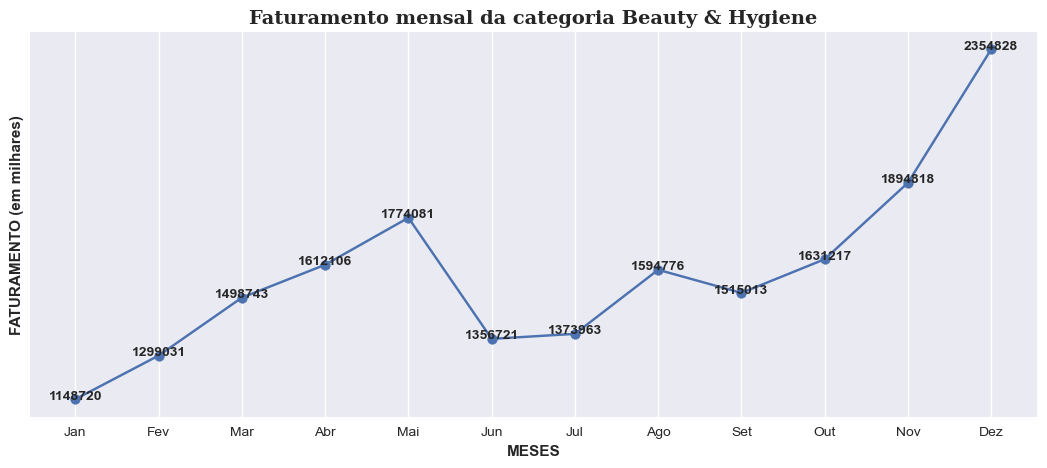

In [15]:
y = newdf['billing']
meses = 'Jan Fev Mar Abr Mai Jun Jul Ago Set Out Nov Dez'.split(' ')
plt.style.use('seaborn')
plt.figure(figsize=(13,5))
plt.title('Faturamento mensal da categoria Beauty & Hygiene',fontsize = 14,fontweight = 'bold',fontfamily = 'serif')
plt.xlabel('MESES',fontweight = 'bold')
plt.ylabel('FATURAMENTO (em milhares)',fontweight = 'bold')
plt.scatter(meses, y)
plt.yticks([0,250,500,750,1000,1250,1500,2000,2500,3000])
for i, v in enumerate(y):
    plt.text(i, v+50, "%d" %v, ha="center",weight = 'bold')
plt.plot(meses,y)
plt.show()


# Questão 3
#### a) A coluna pesquisa de satisfação, como detalhado, está fora de ordem de acordo com as perguntas. A rede deseja realizar um levantamento de qual das perguntas possui mais respostas nulas, ou seja, igual a 0. Retorne essa pergunta.



In [16]:
df['Pesquisa'][1]

"[0, 'Física', 'Ótimo']"

In [17]:
conhecimento = "'Indicação' 'Internet' 'Placas' 'Outros'".split(' ')
qualidade = "'Ótimo' 'Bom' 'Ruim' 'Péssimo'".split(' ')
preferencia = "'Física' 'Online'".split(' ')
pref =0
qual =0
con = 0

In [18]:
for respostas in df['Pesquisa']:
    resposta = respostas[1:-1].split(', ')
    if any(x in preferencia for x in resposta):
        pass
    else:
        pref+=1
    if any(x in qualidade for x in resposta):
        pass
    else:
        qual+=1
    if any(x in conhecimento for x in resposta):
        pass
    else:
        con+=1
print(con,qual,pref)
        


35117 34985 58312


O item 'Preferencia' possui mais respostas nulas


#### b) Monte um gráfico do tipo que achar adequada que exiba as porcentagens de respostas da pergunta obtida no item anterior.

In [19]:
answ = dict(zip(preferencia,3*[0]))
keys = list(answ.keys())
for respostas in df['Pesquisa']:
    resposta = respostas[1:-1].split(', ')
    if keys[0] in resposta: 
        answ[keys[0]]+=1
    elif keys[1] in resposta: 
        answ[keys[1]]+=1
    else: 
        pass
answ

{"'Física'": 58248, "'Online'": 58297}

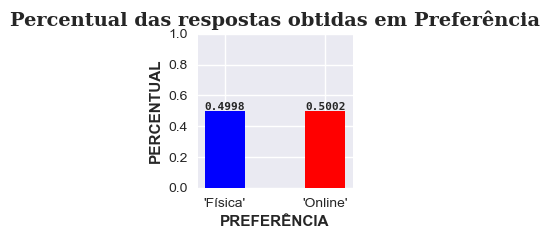

In [20]:
x = keys
y = list(answ.values())
y = [k/np.sum(y) for k in y]
plt.style.use('seaborn')
plt.figure(figsize=(2,2))
plt.title('Percentual das respostas obtidas em Preferência',fontsize = 14,fontweight = 'bold',fontfamily = 'serif')
plt.xlabel('PREFERÊNCIA',fontweight = 'bold')
plt.ylabel('PERCENTUAL',fontweight = 'bold')
plt.bar(x,y,width = 0.4, color = ['blue','red'])
plt.yticks([0,0.20,0.40,0.60,0.80,1])
for i, v in enumerate(y):
    plt.text(i, v+0.005, "%.4f" %v, ha="center",fontsize = 8,fontweight = 'bold',fontfamily = 'monospace')
plt.show()



# Parte 2: Análise

Chegamos na segunda parte do entregável!
Aqui será feita uma análise mais ampla do que o exercício anterior, por isso não tem um script com o que deve ser entregue. Por ser mais ampla e a análise variar de pessoa para pessoa, não tem uma única resposta correta. Todo raciocínio desenvolvido será avalidado, inclusive entender o que deve ser abordado ou não na análise.

Usaremos uma base diferente, em que estão representados as informações de venda de automóveis em um determinado ano.

O objetivo aqui é conseguir extrair insights para um cliente que está realizando uma pesquisa sobre o mercado de carros..

Tendo isso em vista, desenvolva uma análise exploratória dessa base de dados, buscando entender quais informações são relevantes para a precificação de um determinado veículo. Busque entender a relação entre as colunas e para isso você pode utilizar algumas bibliotecas para te auxiliar, como: MatPlotLib e Pandas. Disponibilizaremos treinamentos sobre ambas bibliotecas.
Além disso, você pode pesquisar outras bibliotecas disponíveis, como a Scikit-learn, para complementar a sua análise com métodos de Machine Learning como KNN, regressão logística, regressão linear, SVM e árvores de decisão. Lembrando que a utilização desses métodos não é obrigatória.



Explicação das colunas das bases

* car : Marca do carro 

* price: Preço do carro

* body : Tipo do carro

* mileage : Quilometragem do carro

* engV : Volume da engrenagem

* engType : Combustível de abastecimento

* registration : Se está registrado ou não

* year: Ano do carro

* model : Modelo do carro 

* drive : Tração do carro











In [21]:
import seaborn as sns
car_df = pd.read_csv('car_ad.csv', encoding="ISO-8859-1")

### Compreendendo a base e limpando-a

In [22]:
car_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [23]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [24]:
print(car_df.isna().sum())
car_df = car_df.replace([np.inf, -np.inf], np.nan)
car_df=car_df.dropna()
#por motivos evidentes, vou filtrar os automóveis que tenham preço superior a 0
car_df = car_df[(car_df['price']>0)]
car_df.reset_index(drop=True,inplace = True)

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64


### PLOTANDO RELAÇÃO ENTRE MARCA E PREÇO

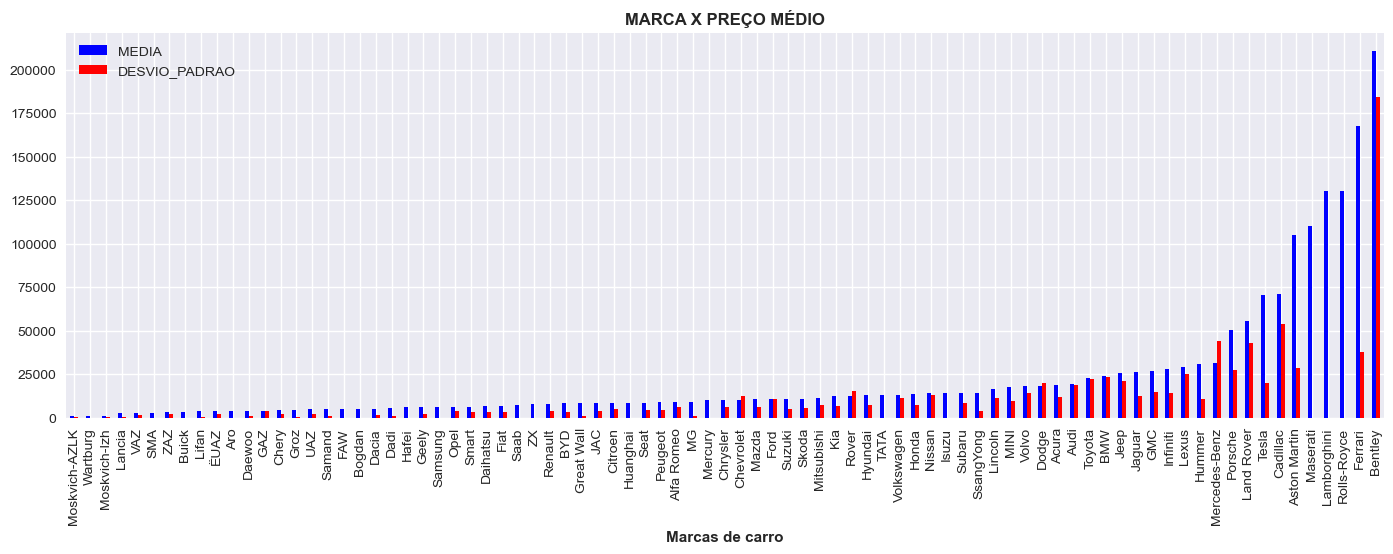

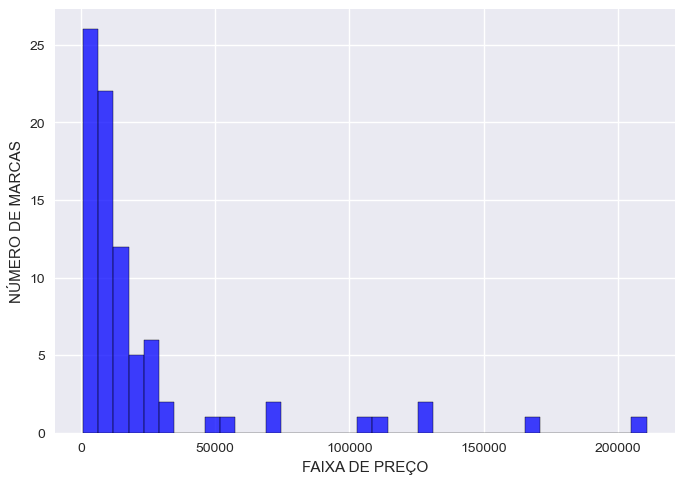

In [25]:
pricexcar = car_df[['car','price']].groupby('car').mean().sort_values(by = 'price')
pricexcar['DESVIO_PADRAO']=car_df[['car','price']].groupby('car').std(ddof=0)['price']
pricexcar = pricexcar.rename(columns={'price':'MEDIA'})
pricexcar = pricexcar.dropna()
pricexcar.plot( kind = 'bar',fontsize = 10,legend = True,subplots=False,figsize=(17,5),color = ['b','r'])
plt.xlabel('Marcas de carro',weight = 'bold')
plt.xticks(rotation = 90)
plt.title('MARCA X PREÇO MÉDIO',weight = 'bold')
plt.style.use('seaborn')
plt.show()
fig, ax = plt.subplots()
ax.set_xlabel('FAIXA DE PREÇO')
ax.set_ylabel('NÚMERO DE MARCAS')
sns.histplot(pricexcar['MEDIA'], ax=ax,color='blue')
plt.show()

#### INSIGHTS
Percebe-se uma distribuição extremamente desigual entre as marcas de carros. Assim, os automóveis de marcas esportiva mais renomadas(Bentley, Ferrari,Maseratti,etc) apresentam um preco medio muito superior se comparados aos demais.
Além disso, a parte massiva das marcas situam-se na faixa inferior a 30000 dólares. Importante ressaltar que, apesar de a marca ser um dos atributos mais relevantes no preço do automóvel, o desvio padrão, indicado em laranja, sempre se mantém elevado devido aos <i><u>demais fatores</u></i>. Vamos analisá-los a seguir:

### MODELO X  PREÇO

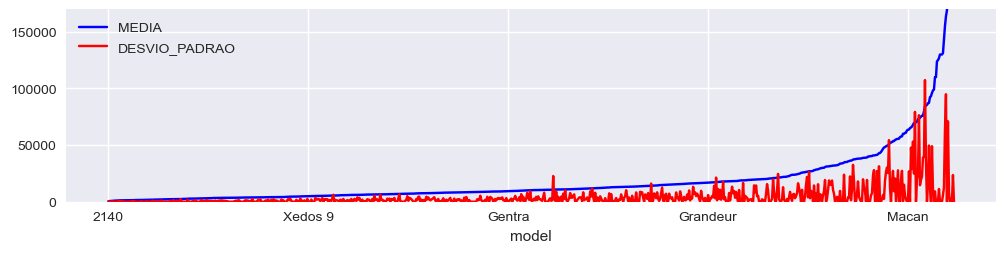

In [26]:
modelxprice = car_df[['model','price']].groupby('model').mean().sort_values(by='price')
modelxprice['DESVIO_PADRAO']=car_df[['model','price']].groupby('model').std(ddof=0)['price']
modelxprice = modelxprice.rename(columns={'price':'MEDIA'})
modelxprice = modelxprice.dropna()
modelxprice.plot(kind = 'line' , ylim = (0,170000),figsize = (12,2.5),color = ['b','r'])
plt.show()

  A partir desse gráfico, pode-se observar que, previsivelmente, o modelo exerce uma influência exponencial muito similar à marca do automóvel: grande discrepância de valor médio, beneficiando os de marcas esportivas, mas com um grande desvio padrão devido às demais variáveis

### CORPO X PREÇO

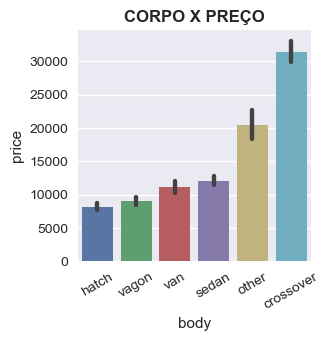

In [27]:
pricexbody = car_df[['body','price']].groupby(by=car_df['body']).mean().sort_values(by = 'price')
plt.figure(figsize=(3,3))
plt.title('CORPO X PREÇO',weight = 'bold')
plt.xlabel(xlabel = 'CORPO')
plt.xticks(rotation = 30)
sns.barplot(x = car_df['body'],y= car_df['price'],order = car_df['price'].groupby(by = car_df['body']).mean().sort_values().index)

plt.show()

É nítido como os 4 primeiros modelos apresentam valores médios similares de preço. Assim, a diferença se torna mais relevante em modelos 'crossover', já que estes misturam características de carros "de passeio", mais comuns no meio urbano, com carros de estrada "off-road", que normalmente contam com tração 4x4. 

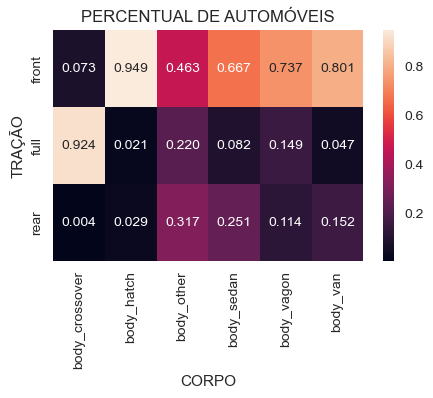

In [28]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
aux = pd.get_dummies(car_df[['drive','body']],columns=['body']).groupby(by=car_df['drive']).sum()
aux = aux/aux.sum()
ax = sns.heatmap(aux,annot=True,fmt='.3f')
ax.set(ylabel='TRAÇÃO',xlabel='CORPO',title='PERCENTUAL DE AUTOMÓVEIS',)
plt.show()

Conforme dito, a larga maioria dos modelos crossover possuem tração 4x4 (92%), tornando-os mais aptos a terrenos instáveis, o que explica sua valorização em relação aos demais modelos. Válido ressaltar como a direção frontal, exceto nos crossover, é a que mais aparece nos demais modelo de automóveis, tendo em vista que, atualmente, é a direção mais eficiente e empregada nos carros modernos quando comparada com a traseira.

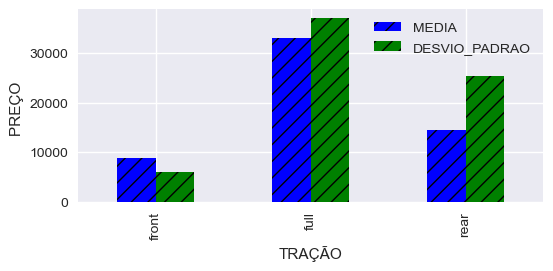

In [33]:
#tração x preco
drivexprice = car_df[['drive','price']].groupby('drive').mean().sort_index()
drivexprice['DESVIO_PADRAO']=car_df[['drive','price']].groupby('drive').std(ddof=0)['price']
drivexprice = drivexprice.rename(columns={'price':'MEDIA'})
drivexprice = drivexprice.dropna()
drivexprice.plot(kind = 'bar' ,figsize = (6,2.5),xlabel='TRAÇÃO',ylabel='PREÇO ',color=['b','g'],hatch='//')
plt.show()

Tal como esperado e previamente analisado na característica 'body', os carros com tração de 4 rodas possuem maior valor agregados, pois são aptos a percorrer estradas instáveis, como barro, terra ou mesmo neve, com menor risco de danificação.
Isso significa que as 4 rodas do carro têm a capacidade de gerar tração e movimento individualmente e de maneira independente. 
Esse fato faz com que um carro 4x4 possa enfrentar com tranquilidade qualquer tipo de terreno, sem atolar ou perder força. 

### VOLUME DA ENGRENAGEM X PREÇO

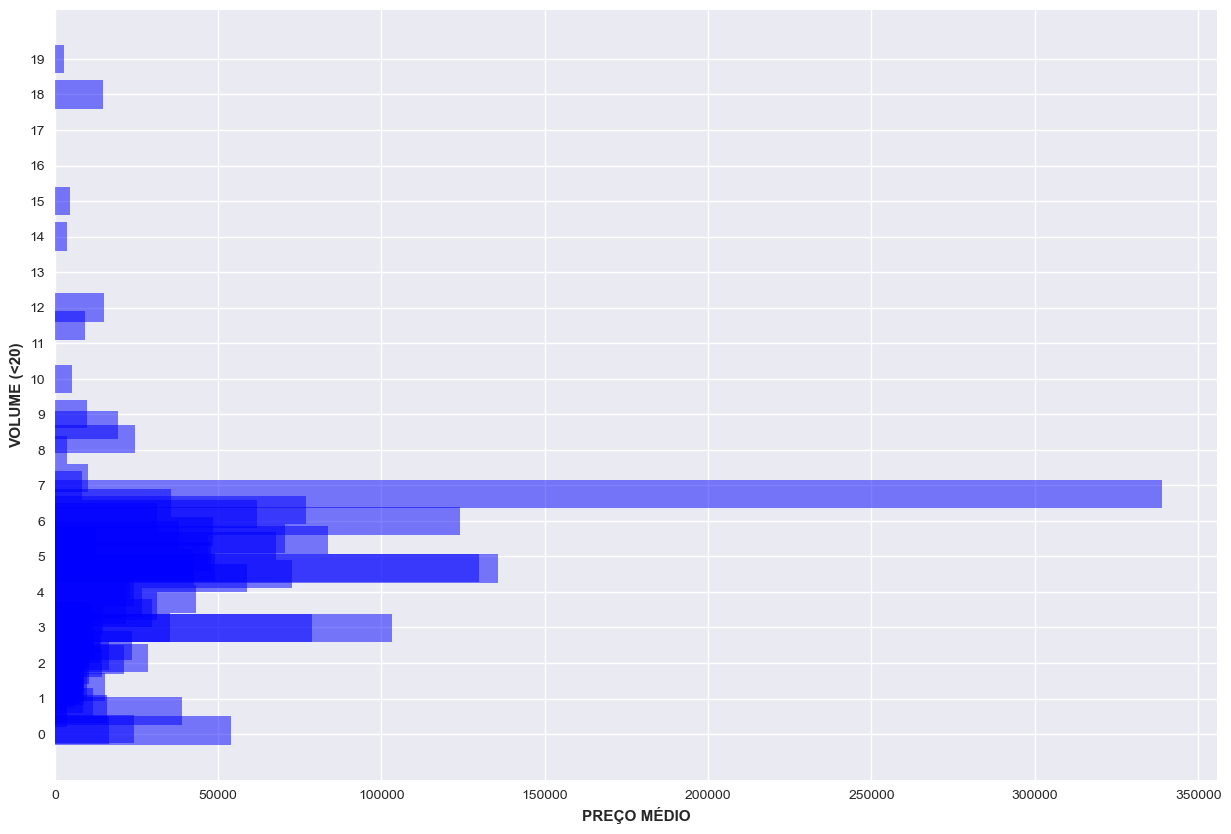

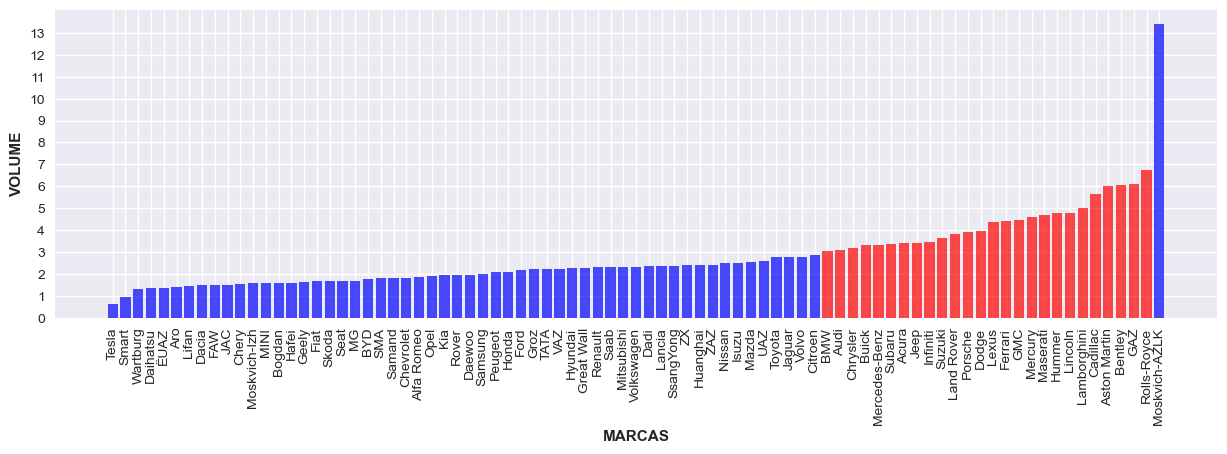

In [35]:
pricexeng = car_df[['engV','price']].groupby(by = car_df['engV']).mean().sort_values(by=['price'])
pricexeng = pricexeng[(pricexeng.index<20)]
plt.figure(figsize=(15,10))
plt.xlabel('PREÇO MÉDIO',weight='bold')
plt.ylabel('VOLUME (<20)',weight='bold')
plt.yticks(ticks = np.array([i for i in range(20)]))
plt.barh(width= pricexeng['price'],y=list(pricexeng.index),color = 'b',alpha = 0.5)
plt.show()

carxeng = car_df[['car','engV']].groupby(by = car_df['car']).mean()
carxeng = carxeng[(carxeng['engV']<20)].sort_values(by='engV')
plt.figure(figsize=(15,4))
plt.yticks(ticks = np.array([i for i in range(14)]))
plt.xticks(rotation=90,fontsize = 10)
plt.xlabel('MARCAS',weight='bold')
plt.ylabel('VOLUME',weight='bold')
def cor(x):
    if x>3 and x<7: return 'red'
    else: return 'blue'
plt.bar(x = list(carxeng.index),height=carxeng['engV'],color = list(map(cor,carxeng['engV'])),alpha=0.7)
plt.show()

#### INSIGHTS
Não se nota nenhuma relação relevante entre o volume da engrenagem e o valor do automóvel. Entretando, observando o primeiro gráfico, percebe-se que os carros cujo volume da engrenagem está entre 3 e 7 unidades são mais caros. Já pelo segundo gráfico, nota-se que justamente as marcas de maior valor agregado,sobretudo as fabricantes de modelos esportivos de performance e luxo, situam-se nessa mesma faixa. Vale ressaltar que nem todas as marcas de alto valor agregado, como a Tesla, situam-se nessa faixa.

### MILHAGEM X PREÇO

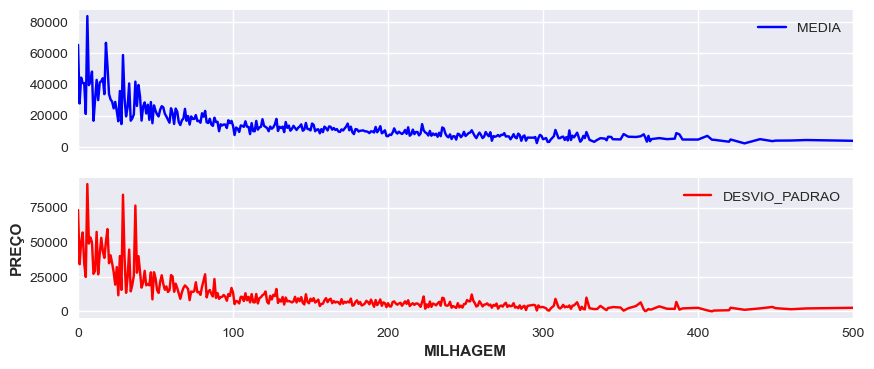

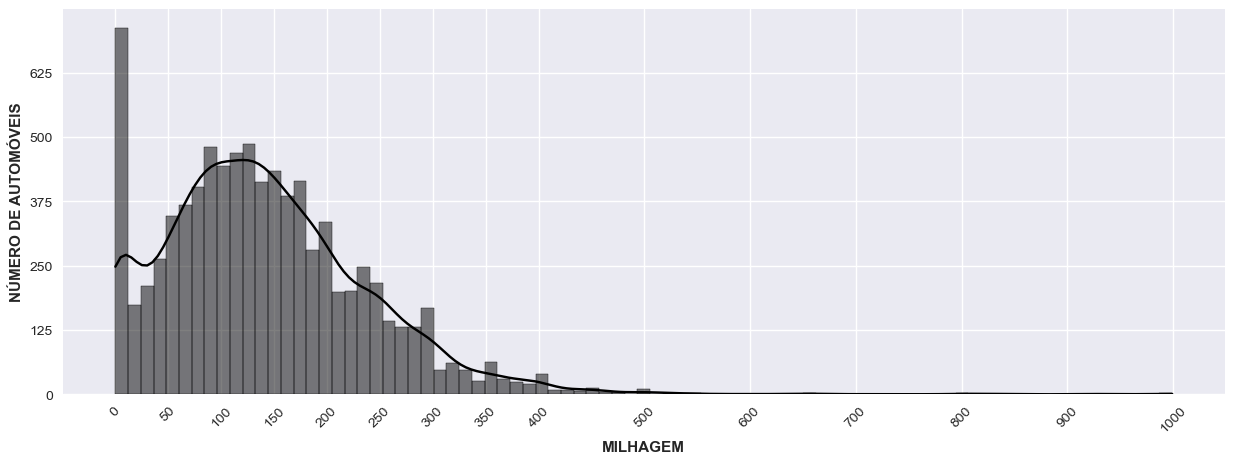

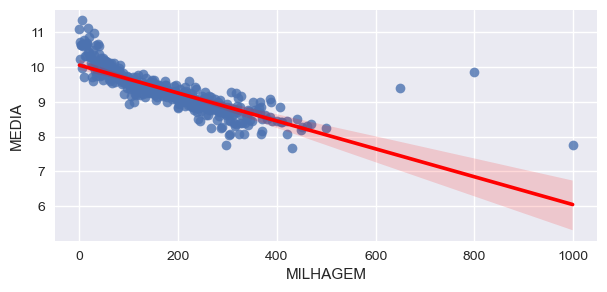

In [36]:
pricexmile = car_df[['mileage','price']].groupby('mileage').mean()
pricexmile['DESVIO_PADRAO'] =  car_df[['mileage','price']].groupby('mileage').std()['price']
pricexmile = pricexmile.rename(columns={'price':'MEDIA'}).dropna()
pricexmile.plot( kind = 'line',fontsize = 10,legend = True,subplots=True,figsize=(10,4),logy = False,xlim = (0,500),color = ['b','r'])
plt.xlabel('MILHAGEM',weight = 'bold')
plt.ylabel('PREÇO',weight='bold')
plt.show()

plt.figure(figsize=(15,5))
plt.yticks(ticks = np.array([125*i for i in range(int(3500/125))]))
plt.xticks(ticks = np.array([50*i for i in range(8)]+[400 + 100*j for j in range(7)]),rotation=45)
plt.xlabel('MILHAGEM',weight='bold')
plt.ylabel('NÚMERO DE AUTOMÓVEIS',weight='bold')
sns.histplot(car_df['mileage'].sort_values(ascending=True),color = 'black',kde=True)
plt.show()

pricexmile['MEDIA']=np.log(pricexmile['MEDIA'])
plt.figure(figsize=(7,3))
sns.regplot(y = pricexmile['MEDIA'],x=(list(pricexmile.index)),scatter=True,line_kws={'color': 'red'})
plt.xlabel('MILHAGEM')
plt.show()


Carros com milhagem baixa tendem a ter maior valorização comercial, visto que o uso do maquinário automotivo é menor, implicando uma maior longevidade do automóvel. Entretanto, no 1 gráfico, percebe-se um desvio anômalo do preço médio X milhagem a partir de 600 milhas. Como exibido no gráfico 2, isso ocorre devido ao baixo número de automóveis que se enquadram nessa faixa e, portanto, alteram significativamente a média. Válido ressaltar que o desvio padrão se mantém próXimo a média em praticamente todo o gráfico. Aplicando uma regressão linear ao gráfico do preco X milhagem, aplicando o log de 'e' no eixo y, percebe-se que a linha traçada consegue aproximar bem os resultados reais.

### COMBUSTÍVEL & REGISTRO X PREÇO

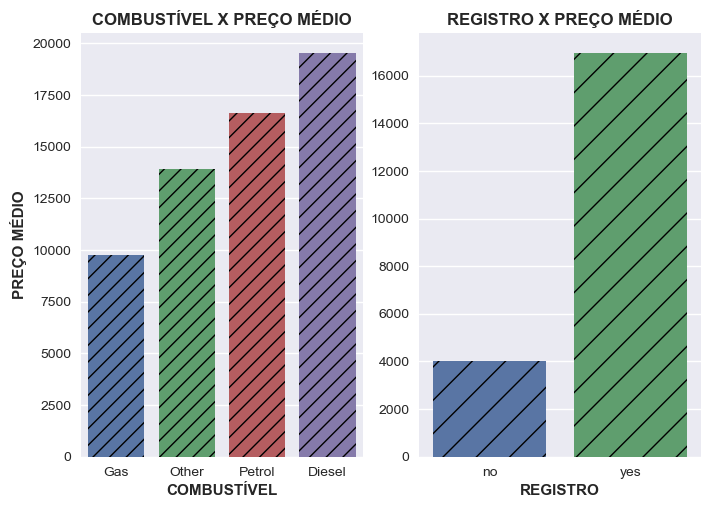

<Figure size 200x300 with 0 Axes>

In [37]:
#combustivel x preco
fig, axes = plt.subplots(1,2)
pricextype = car_df[['engType','price']].groupby('engType').mean().sort_values(by='price')
sns.barplot(x = list(pricextype.index),y=pricextype['price'],hatch='//',ax=axes[0])
axes[0].set_xlabel('COMBUSTÍVEL',weight = 'bold')
axes[0].set_ylabel('PREÇO MÉDIO',weight = 'bold')
axes[0].set_title('COMBUSTÍVEL X PREÇO MÉDIO',weight = 'bold')
#registro x preco
pricexreg = car_df[['registration','price']].groupby('registration').mean().sort_values(by='price')
plt.figure(figsize=(2,3))
axes[1].set_xlabel('REGISTRO',weight = 'bold')
axes[1].set_title('REGISTRO X PREÇO MÉDIO',weight = 'bold')
sns.barplot(x = list(pricexreg.index),y=pricexreg['price'],hatch='/',ax=axes[1])
axes[1].set_ylabel('')
plt.show()

O tipo de combustível também influencia o preço médio do automóvel. O diesel possui um poder calorífico superior ao gás natural e à gasolina, resultando num maior rendimento por litro, sende este o provável motivo pelo qual automóvies que fazem uso dele são mais bem precificados. Além disso, a maior abundância, rendimento e compatilidade dos derivados de petróleo em comparação com o gás natural justifica o maior preço médio dessa categoria. </br>Já o registro, por sua vez, revela-se um fator de grande discrepância no valor do carro. Como o registro é uma obrigação jurídica que todo automóvel deve apresentar, a ausência dele implica grande desvalorização. Conforme o site da própria Zona Azul: <a src='https://www.zuldigital.com.br/blog/carro-nao-registrado/'> "Ter um carro não registrado gera consequências graves para qualquer motorista, como multa e até retenção do veículo no pátio."</a>

### IDADE X PREÇO

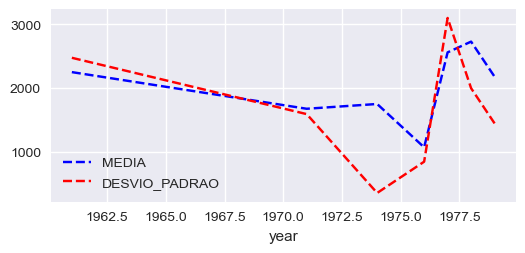

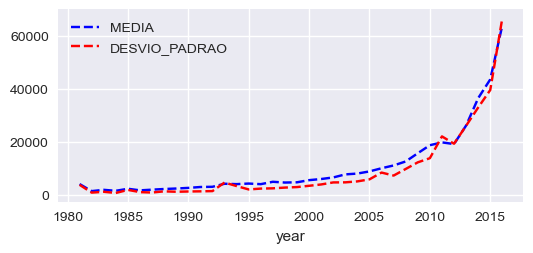

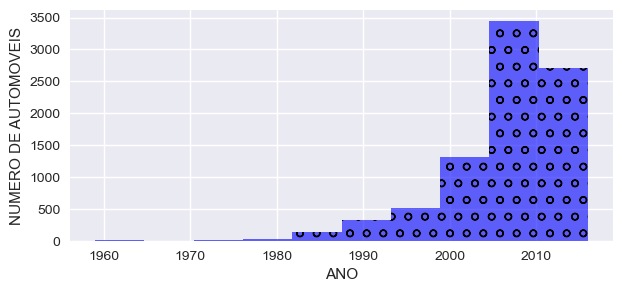

In [40]:
oldxprice = car_df[['year','price']].groupby('year').mean().sort_index()
oldxprice['DESVIO_PADRAO']=car_df[['year','price']].groupby('year').std()['price']
oldxprice = oldxprice.rename(columns={'price':'MEDIA'})
oldxprice = oldxprice.dropna()
oldxprice1 = oldxprice.loc[[i<1980 for i in list(oldxprice.index)]]
oldxprice2 = oldxprice.loc[[i>1980 for i in list(oldxprice.index)]]
oldxprice1.plot(kind = 'line' ,figsize = (6,2.5),ls='--',color = ['b','r'])
plt.show()

oldxprice2.plot(kind = 'line' ,figsize = (6,2.5),ls='--',color = ['b','r'])
plt.show()

plt.figure(figsize=(7,3))
plt.xlabel('ANO')
plt.ylabel('NUMERO DE AUTOMOVEIS')
plt.hist(x = car_df['year'],color = 'b',alpha=0.6,hatch='o')
plt.show()

#### INSIGHTS
Carros mais recentes tendem a ter um valor médio de mercado superior, já que, normalmente, possuem peças mais eficientes e modernas, além do menor desgate delas. Esse padrão é melhor observadoa a partir de 1980 num crescimento aproximadamente exponencial do valor médio. Contudo, a variação de preço dentro do mesmo ano é extremamente significativa, ultrapassando até mesmo a média, indicando como os demais fatores ocasionam um desequilíbrio no preço. Vale ressaltar que no período anterior a 1980, o baixo número de veículos registrados na tabela implicaram uma variação mais desordenada na média.

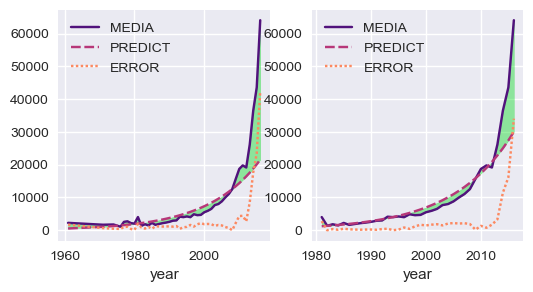

In [41]:
#analisando o carater exponencial e encontrando uma relação entre ano e preço médio
from sklearn.linear_model import LinearRegression
fig,ax = plt.subplots(1,2,figsize = (6,3))
oldxprice = oldxprice.drop(columns = ['DESVIO_PADRAO'])
oldxprice['MEDIA'] = list(np.log(np.array(oldxprice['MEDIA']))) #utilizando log na coluna da média a fim de conseguir utilizar um modelo linear, ja que a curva é exponencial
oldxprice.head()
#usando o modelo de regressao lineaar
model = LinearRegression()
x = np.array(oldxprice.index)
y = np.array(list(oldxprice['MEDIA']))
x = x.reshape(-1,1)
y=y.reshape(-1,1)
model.fit(x,y)
oldxprice['PREDICT'] = model.predict(x)
oldxprice['PREDICT'] = (np.e)**oldxprice['PREDICT'] #tranformando os modelos lineares obtidos de volta aos valores reais de carater exponencial
oldxprice['MEDIA'] = (np.e)**oldxprice['MEDIA']
oldxprice['ERROR'] = np.sqrt((oldxprice['MEDIA'] - oldxprice['PREDICT'])**2)
sns.lineplot(data = oldxprice,ax =ax[0] ,palette = 'magma')
ax[0].fill_between(list(oldxprice.index),oldxprice['MEDIA'],oldxprice['PREDICT'],color='#00db1a',alpha=0.4)

#plotando para o periodo posterior a 1980
oldxprice2 = oldxprice2.drop(columns = ['DESVIO_PADRAO'])
oldxprice2['MEDIA'] = list(np.log(np.array(oldxprice2['MEDIA'])))
x = np.array(oldxprice2.index)
y = np.array(list(oldxprice2['MEDIA']))
x = x.reshape(-1,1)
y=y.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
oldxprice2['PREDICT'] = model.predict(x)
oldxprice2['PREDICT'] = (np.e)**oldxprice2['PREDICT']
oldxprice2['MEDIA'] = (np.e)**oldxprice2['MEDIA']
oldxprice2['ERROR'] = np.sqrt((oldxprice2['MEDIA'] - oldxprice2['PREDICT'])**2)
sns.lineplot(data = oldxprice2,ax =ax[1], palette='magma')
ax[1].fill_between(list(oldxprice2.index),oldxprice2['MEDIA'],oldxprice2['PREDICT'],color='#00db1a',alpha = 0.4)
plt.show()

#### INSIGHTS
Utilizando como base o log natural do preço médio por ano, foi possível construir uma regressão que se aproxima significativamente do valor médio, demonstrando a forte correlçaõ entre eles. Além disso, no período após 1980, em que a concentração de automóveis é muito elevada, a regressão traçada se aproxima ainda mais da curva original média. 

### FAZENDO UM MODELO PREDITIVO DA FAIXA DE PREÇO UTILIZANDO REGRESSOR KNN
Para aplicar o modelo preditivo, irei substituir as variaveis não-numéricas pela média de cada um dos valores encontrados em cada categoria. 
Num primeiro momento, tentei fazer uso de variáveis fictícias(dummies), mas a precisão foi muito menor quando comparado à substituição via média.


In [42]:
#SUBSTITUINDO VALORES "OBJECT" PELA MÉDIA
car_df.car = car_df.car.replace(dict(zip(list(pricexcar.index),pricexcar['MEDIA'])))
car_df.body = car_df.body.replace(dict(zip(list(pricexbody.index),pricexbody['price'])))
car_df.drive = car_df.drive.replace(dict(zip(list(drivexprice.index),drivexprice['MEDIA'])))
car_df.engType = car_df.engType.replace(dict(zip(list(pricextype.index),pricextype['price'])))
car_df.registration = car_df.registration.replace(dict(zip(list(pricexreg.index),pricexreg['price'])))
car_df.year = car_df.year.replace(dict(zip(list(oldxprice.index),oldxprice['MEDIA'])))
car_df.year = car_df.year.replace(dict(zip(list(oldxprice.index),oldxprice['MEDIA'])))
car_df.engV = car_df.engV.replace(dict(zip(list(pricexeng.index),pricexeng['price'])))
car_df.mileage = car_df.mileage.replace(dict(zip(list(pricexmile.index),pricexmile['MEDIA'])))
car_df['car'] = car_df['car'].loc[[type(x)!= str for x in car_df['car'] ]]
car_df.dropna()
car_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,10480.021642,15500.0,31452.668941,9.804388,11748.194898,9738.781792,16940.73432,18710.451681,Kuga,33063.079403
1,31187.476129,20500.0,12120.658908,9.475204,10484.599565,9738.781792,16940.73432,19779.527379,E-Class,14390.637631
2,31187.476129,35000.0,20524.042167,9.406223,70562.018182,16639.036916,16940.73432,12568.789229,CL 550,14390.637631
3,31187.476129,17800.0,11106.942794,9.478173,10484.599565,19515.881890,16940.73432,19142.085741,B 180,8736.492514
4,13879.027984,16600.0,31452.668941,9.660057,14442.565133,16639.036916,16940.73432,26144.950712,X-Trail,33063.079403


In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor

In [44]:
aux = car_df.drop(columns = ['model']).dropna() #a coluna model, por ter uma larga quantidade de variáveis, piora a modelo preditivo e torna ele lento
aux = aux.replace([np.inf, -np.inf], np.nan).dropna()
aux=aux.dropna()
x = aux.drop(columns=['price'])
y = aux['price']
stdscal = StandardScaler().fit(x)
x = stdscal.transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True)

In [45]:
model_knn = KNeighborsRegressor()
params_knn = {'n_neighbors':[1,2,3,4,5,10,20,30],'p':[1,2],'n_jobs':[-1],'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
search_knn = GridSearchCV(estimator=model_knn,param_grid=params_knn,n_jobs=-1,cv=10)
search_model_knn = search_knn.fit(xtrain,ytrain)
predict = search_model_knn.predict(xtest)
print(r2_score(list(ytest),predict))


0.8824832029492767


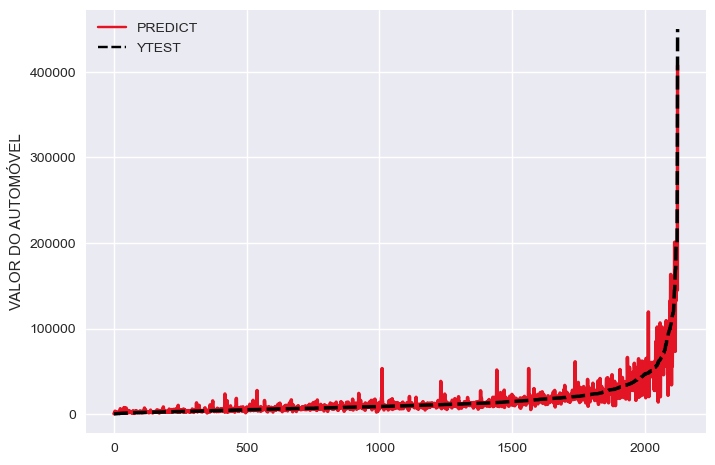

In [46]:
knndf = pd.DataFrame({'PREDICT':predict,'YTEST':list(ytest)}).sort_values(by=['YTEST']).reset_index( drop=True)
fig,ax = plt.subplots()
sns.lineplot(data=knndf,palette=['#E31423','black'],ax=ax,lw=2.5,)
ax.set(xlabel='',ylabel='VALOR DO AUTOMÓVEL')
plt.show()

Como visto no resultado acima, foi possível obter um resultado satisfatório (a metrica utilizada foi o   <a src='coursera.org/learn/ciencia-computacao-python-conceitos-2/home/week/1'> R2-score </a> - quanto mais próximo de 1 melhor) utilizando o regressor knn para encontrar o preço dos automóveis a partir de suas características. Foram testados outros classificadores, como o Random Forest, mas o mais preciso foi o KNN.</br> Alem disso, os outros modelos levavam um tempo extremamente superior para prever os valores.
A fim de encontrar os melhores parâmetros possíveis, utilizei o grid search para testar múltiplos valores de k-neighbors, diferentes métricas de distância e diferentes algoritmos. Para realizar um vasto número de testes, utilizei cross-validation com 10 folds</br>
Nota-se como o valor previsto apresenta desvios do valor real,que se tornam progressivamente maiores, mas ambas as curvas seguem o mesmo formato
Esse modelo poderá ser utilizado futuramente para auxiliar na avaliação do valor justo de um automóvel no momento de venda ou de compra.

# CONCLUSÕES
Sintetizando agora as principais correlações encontradas entre as colunas:
### PREÇO X IDADE:
Notou-se um decaimento exponencial do preço com o aumento da idade do automóvel, o que é decorrente da maior probabilidade de falha das peças devido ao maior desgaste, além não incorporar as tecnologias mais modernas.
Tão claro é esse caráter exponencial que foi possível traçar uma regressão bastante aproximada do valor real das médias ano a ano.
### PREÇO X MILHAGEM:
Tal como a idade, a mihagem apresenta um comportamento similar de depreciação exponencial do automóvel conforme o aumento da distância percorrida. Ainda que não tão precisa quanto à anterior, a reta obtida fazendo-se uma regressão linear sobre o log natural do preço médio aproxima-se da dispersão dos pontos que correlacionam milhagem x preço
### PREÇO X CORPO & TRAÇÃO:
Dentre todos os modelos, o que mais se destacou foi o crossover. Analisando o heatmap e realizando algumas pesquisas, tornou-se claro como o fato de que os modelos crossover serem, em sua maioria, de tração 4x4 (coluna 'drive') implica um aumento no valor médio dessa categoria, tendo em vista que versatilidade dos veículos cujas 4 rodas realizam trabalho é maior.
Dentre as trações, a 4x4 é a mais valorizada, seguida pela direção fronteira, que é mais moderna e mais utilizada
### PREÇO X COMBUSTÍVEL:
Dentre os combustíveis listados, a variação do preço médio dos automóveis enquadrados em cada uma das categorias relaciona-se, sobretudo, à eficiência energética e à disponibilidade de cada um, sendo o diesel o mais valoirzado e o gás natural o menos.
### PREÇO X CARRO & MODELO:
Conforme esperado, as marcas/modelos associadas à veículos de luxo, esportivos e alta performance estiveram associadas a maiores preços médios, sendo observados curvas exponencias de crescimento em ambas as modalidades


